In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk', font_scale=1.5)
sns.set(color_codes=True)

%matplotlib inline

In [2]:
from Models.succinogenes import v6_new_biomass_atpm
from Models.ecoli import ecoli_core_biomass

succ = v6_new_biomass_atpm()
ecoli = ecoli_core_biomass()

In [3]:
succ_efms = pd.read_pickle('efms_full/succ_efms.p')
ecoli_efms = pd.read_pickle('efms_full/ecoli_efms.p')

succ_efms_red = pd.read_pickle('succinogenes/efm_hull_reduced.p')
ecoli_efms_red = pd.read_pickle('ecoli/efm_hull_reduced.p')

In [4]:
from scipy.spatial import ConvexHull

def get_qhull_poly(points, **poly_args):
    qhull = ConvexHull(points)
    return plt.Polygon(qhull.points[qhull._vertices], closed=True, **poly_args)

def lighten_color(color, degree):
    cin = matplotlib.colors.colorConverter.to_rgb(color)
    cw = np.array([1.0]*3)
    return tuple(cin + (cw - cin)*degree)

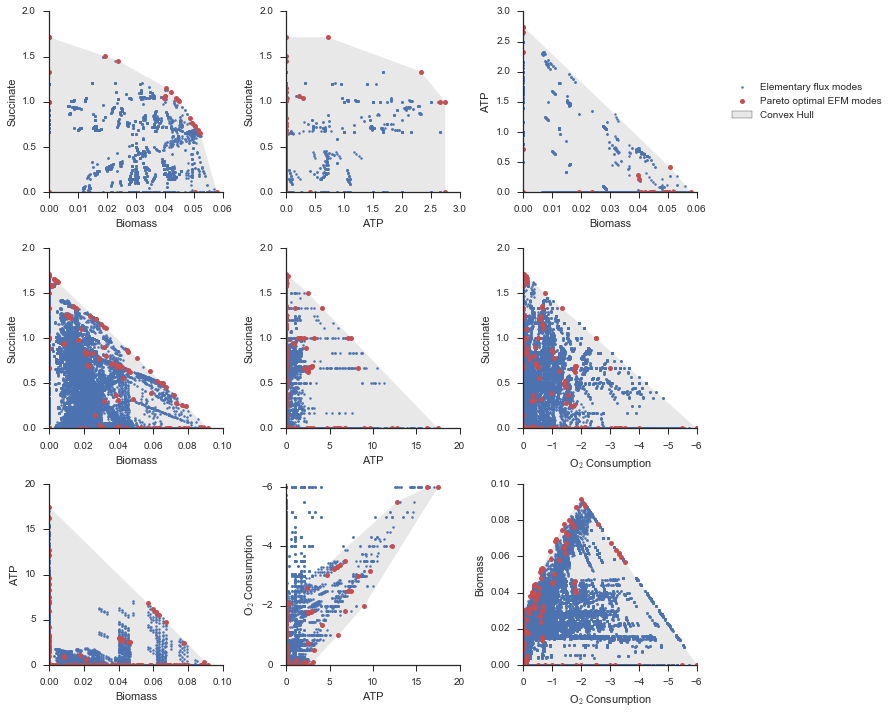

In [5]:
import matplotlib.gridspec as gridspec

sns.set_style('ticks')

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3, 3)

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1], sharey=ax1)
ax3 = plt.subplot(gs[0,2], sharex=ax1)

ax4 = plt.subplot(gs[1,0], sharey=ax1)
ax5 = plt.subplot(gs[1,1], sharey=ax1)
ax6 = plt.subplot(gs[1,2], sharey=ax1)

ax7 = plt.subplot(gs[2,0], sharex=ax4)
ax8 = plt.subplot(gs[2,1], sharex=ax5)
ax9 = plt.subplot(gs[2,2], sharex=ax6)

ax1.plot(succ_efms.EX_biomass, succ_efms.EX_succ_e, '.', markersize=5., rasterized=True)
points = ax2.plot(succ_efms.EX_atpm.values, succ_efms.EX_succ_e.values, '.', markersize=5., rasterized=True)
ax3.plot(succ_efms.EX_biomass, succ_efms.EX_atpm, '.', markersize=5., rasterized=True)

ax1.plot(succ_efms_red.EX_biomass, succ_efms_red.EX_succ_e, 'r.', markersize=10.)
hull_points =  ax2.plot(succ_efms_red.EX_atpm, succ_efms_red.EX_succ_e, 'r.', markersize=10.)
ax3.plot(succ_efms_red.EX_biomass, succ_efms_red.EX_atpm, 'r.', markersize=10.)
    
ax1.add_patch(get_qhull_poly(succ_efms_red.loc[:, ['EX_biomass', 'EX_succ_e']],
                             edgecolor='none', facecolor=lighten_color('k', 0.9), alpha=1., zorder=0))
patch = ax2.add_patch(get_qhull_poly(succ_efms_red.loc[:, ['EX_atpm', 'EX_succ_e']],
                             edgecolor='none', facecolor=lighten_color('k', 0.9), alpha=1., zorder=0,
                             label='Convex Hull'))
ax3.add_patch(get_qhull_poly(succ_efms_red.loc[:, ['EX_biomass', 'EX_atpm']],
                             edgecolor='none', facecolor=lighten_color('k', 0.9), alpha=1., zorder=0))

    
    
#plt.setp(ax1.get_xticklabels(), visible=False)
#plt.setp(ax3.get_yticklabels(), visible=False)


ax1.set_ylabel('Succinate')
ax2.set_ylabel('Succinate')
ax3.set_ylabel('ATP')

ax1.set_xlabel('Biomass')
ax2.set_xlabel('ATP')
ax3.set_xlabel('Biomass')



#plt.setp(ax4.get_xticklabels(), visible=False)
#plt.setp(ax6.get_yticklabels(), visible=False)


ax4.plot(ecoli_efms.EX_biomass, ecoli_efms.EX_succ_e, '.', markersize=5., rasterized=True)
ax5.plot(ecoli_efms.EX_atpm, ecoli_efms.EX_succ_e, '.', markersize=5., rasterized=True)
ax6.plot(ecoli_efms.EX_o2_e, ecoli_efms.EX_succ_e, '.', markersize=5., rasterized=True)

ax4.plot(ecoli_efms_red.EX_biomass, ecoli_efms_red.EX_succ_e, 'r.', markersize=10.)
ax5.plot(ecoli_efms_red.EX_atpm, ecoli_efms_red.EX_succ_e, 'r.', markersize=10.)
ax6.plot(ecoli_efms_red.EX_o2_e, ecoli_efms_red.EX_succ_e, 'r.', markersize=10.)

ax4.add_patch(get_qhull_poly(ecoli_efms_red.loc[:, ['EX_biomass', 'EX_succ_e']],
                             edgecolor='none', facecolor=lighten_color('k', 0.9), alpha=1., zorder=0))
ax5.add_patch(get_qhull_poly(ecoli_efms_red.loc[:, ['EX_atpm', 'EX_succ_e']],
                             edgecolor='none', facecolor=lighten_color('k', 0.9), alpha=1., zorder=0))
ax6.add_patch(get_qhull_poly(ecoli_efms_red.loc[:, ['EX_o2_e', 'EX_succ_e']],
                             edgecolor='none', facecolor=lighten_color('k', 0.9), alpha=1., zorder=0))

ax6.set_xlim([-6, 0])
ax6.invert_xaxis()


ax4.set_ylabel('Succinate')
ax5.set_ylabel('Succinate')
ax6.set_ylabel('Succinate')

ax4.set_xlabel('Biomass')
ax5.set_xlabel('ATP')
ax6.set_xlabel(r'O${}_2$ Consumption')

ax7.plot(ecoli_efms.EX_biomass, ecoli_efms.EX_atpm, '.', markersize=5., rasterized=True)
ax8.plot(ecoli_efms.EX_atpm, ecoli_efms.EX_o2_e, '.', markersize=5., rasterized=True)
ax9.plot(ecoli_efms.EX_o2_e, ecoli_efms.EX_biomass, '.', markersize=5., rasterized=True)

ax7.plot(ecoli_efms_red.EX_biomass, ecoli_efms_red.EX_atpm, 'r.', markersize=10.)
ax8.plot(ecoli_efms_red.EX_atpm, ecoli_efms_red.EX_o2_e, 'r.', markersize=10.)
ax9.plot(ecoli_efms_red.EX_o2_e, ecoli_efms_red.EX_biomass, 'r.', markersize=10.)

ax7.add_patch(get_qhull_poly(ecoli_efms_red.loc[:, ['EX_biomass', 'EX_atpm']],
                             edgecolor='none', facecolor=lighten_color('k', 0.9), alpha=1., zorder=0))
ax8.add_patch(get_qhull_poly(ecoli_efms_red.loc[:, ['EX_atpm', 'EX_o2_e']],
                             edgecolor='none', facecolor=lighten_color('k', 0.9), alpha=1., zorder=0))
ax9.add_patch(get_qhull_poly(ecoli_efms_red.loc[:, ['EX_o2_e', 'EX_biomass']],
                             edgecolor='none', facecolor=lighten_color('k', 0.9), alpha=1., zorder=0))

ax8.set_ylim([-6.1, 0])
ax8.invert_yaxis()

ax7.set_xlabel('Biomass')
ax8.set_xlabel('ATP')
ax9.set_xlabel(r'O${}_2$ Consumption')

ax7.set_ylabel('ATP')
ax8.set_ylabel(r'O${}_2$ Consumption')
ax9.set_ylabel('Biomass')

ax2.legend(handles=[points[0], hull_points[0], patch],
           labels=['Elementary flux modes', 'Pareto optimal EFM modes', 'Convex Hull'],
           bbox_to_anchor=(3., .5), loc='center')

sns.despine(fig)

for ax in fig.axes:
    ax.locator_params(tight=False, nbins=6)

#fig.text(0.25, 1., 'A. succinogenes', ha='center', va='bottom', fontsize=12, fontweight='bold')
#fig.text(0.75, 1., 'E. coli', ha='center', va='bottom', fontsize=12, fontweight='bold')

fig.tight_layout()

#fig.subplots_adjust(wspace=0.2, hspace=0.2)

fig.savefig('figs/EFM_surfs_sq.svg', dpi=400)